In [103]:
# @hidden_cell
# The project token is an authorization token that is used to access project resources like data sources, connections, and used by platform APIs.
from project_lib import Project
project = Project(project_id='a6b6a3bf-f990-437c-84ad-68575bd52bb3', project_access_token='p-bb8d005c325a45ae7f5c2706ba3dfbc1549e3f8e')
pc = project.project_context


#### Import all your datasets

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn. model_selection import GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.ensemble import RandomForestRegressor,GradientBoostingRegressor
from sklearn import metrics

print('Done Importing')

Done Importing


In [2]:

import types
from botocore.client import Config
import ibm_boto3

def __iter__(self): return 0

# @hidden_cell
# The following code accesses a file in your IBM Cloud Object Storage. It includes your credentials.
# You might want to remove those credentials before you share your notebook.
client_887e8fed66994bce85b726a4b6eee3dd = ibm_boto3.client(service_name='s3',
    ibm_api_key_id='UskpKY2fd9iRc08J-8Yw01IefPVS8sBvpG_9cKfPEPfx',
    ibm_auth_endpoint="https://iam.bluemix.net/oidc/token",
    config=Config(signature_version='oauth'),
    endpoint_url='https://s3-api.us-geo.objectstorage.service.networklayer.com')

body = client_887e8fed66994bce85b726a4b6eee3dd.get_object(Bucket='dengaipredictingdiseasespread-donotdelete-pr-9ljhigmhx6empl',Key='dengue_features_train.csv')['Body']
# add missing __iter__ method, so pandas accepts body as file-like object
if not hasattr(body, "__iter__"): body.__iter__ = types.MethodType( __iter__, body )

df_train = pd.read_csv(body)
df_train.head()



,city,year,weekofyear,week_start_date,ndvi_ne,ndvi_nw,ndvi_se,ndvi_sw,precipitation_amt_mm,reanalysis_air_temp_k,...,reanalysis_precip_amt_kg_per_m2,reanalysis_relative_humidity_percent,reanalysis_sat_precip_amt_mm,reanalysis_specific_humidity_g_per_kg,reanalysis_tdtr_k,station_avg_temp_c,station_diur_temp_rng_c,station_max_temp_c,station_min_temp_c,station_precip_mm
0,sj,1990,18,1990-04-30,0.122600,0.103725,0.198483,0.177617,12.42,297.572857,...,32.00,73.365714,12.42,14.012857,2.628571,25.442857,6.900000,29.4,20.0,16.0
1,sj,1990,19,1990-05-07,0.169900,0.142175,0.162357,0.155486,22.82,298.211429,...,17.94,77.368571,22.82,15.372857,2.371429,26.714286,6.371429,31.7,22.2,8.6
2,sj,1990,20,1990-05-14,0.032250,0.172967,0.157200,0.170843,34.54,298.781429,...,26.10,82.052857,34.54,16.848571,2.300000,26.714286,6.485714,32.2,22.8,41.4
3,sj,1990,21,1990-05-21,0.128633,0.245067,0.227557,0.235886,15.36,298.987143,...,13.90,80.337143,15.36,16.672857,2.428571,27.471429,6.771429,33.3,23.3,4.0
4,sj,1990,22,1990-05-28,0.196200,0.262200,0.251200,0.247340,7.52,299.518571,...,12.20,80.460000,7.52,17.210000,3.014286,28.942857,9.371429,35.0,23.9,5.8


In [3]:

body = client_887e8fed66994bce85b726a4b6eee3dd.get_object(Bucket='dengaipredictingdiseasespread-donotdelete-pr-9ljhigmhx6empl',Key='dengue_labels_train.csv')['Body']
# add missing __iter__ method, so pandas accepts body as file-like object
if not hasattr(body, "__iter__"): body.__iter__ = types.MethodType( __iter__, body )

df_labels = pd.read_csv(body)
df_labels.head()



,city,year,weekofyear,total_cases
0,sj,1990,18,4
1,sj,1990,19,5
2,sj,1990,20,4
3,sj,1990,21,3
4,sj,1990,22,6


In [4]:

body = client_887e8fed66994bce85b726a4b6eee3dd.get_object(Bucket='dengaipredictingdiseasespread-donotdelete-pr-9ljhigmhx6empl',Key='dengue_features_test.csv')['Body']
# add missing __iter__ method, so pandas accepts body as file-like object
if not hasattr(body, "__iter__"): body.__iter__ = types.MethodType( __iter__, body )

df_test = pd.read_csv(body)
df_test.head()



,city,year,weekofyear,week_start_date,ndvi_ne,ndvi_nw,ndvi_se,ndvi_sw,precipitation_amt_mm,reanalysis_air_temp_k,...,reanalysis_precip_amt_kg_per_m2,reanalysis_relative_humidity_percent,reanalysis_sat_precip_amt_mm,reanalysis_specific_humidity_g_per_kg,reanalysis_tdtr_k,station_avg_temp_c,station_diur_temp_rng_c,station_max_temp_c,station_min_temp_c,station_precip_mm
0,sj,2008,18,2008-04-29,-0.0189,-0.018900,0.102729,0.091200,78.60,298.492857,...,25.37,78.781429,78.60,15.918571,3.128571,26.528571,7.057143,33.3,21.7,75.2
1,sj,2008,19,2008-05-06,-0.0180,-0.012400,0.082043,0.072314,12.56,298.475714,...,21.83,78.230000,12.56,15.791429,2.571429,26.071429,5.557143,30.0,22.2,34.3
2,sj,2008,20,2008-05-13,-0.0015,NaN,0.151083,0.091529,3.66,299.455714,...,4.12,78.270000,3.66,16.674286,4.428571,27.928571,7.785714,32.8,22.8,3.0
3,sj,2008,21,2008-05-20,NaN,-0.019867,0.124329,0.125686,0.00,299.690000,...,2.20,73.015714,0.00,15.775714,4.342857,28.057143,6.271429,33.3,24.4,0.3
4,sj,2008,22,2008-05-27,0.0568,0.039833,0.062267,0.075914,0.76,299.780000,...,4.36,74.084286,0.76,16.137143,3.542857,27.614286,7.085714,33.3,23.3,84.1


##### Merge the two datasets df_train and df_labels on the common columns

In [5]:
df=pd.merge(df_train,df_labels,on=['city','year','weekofyear'])
df.head()

,city,year,weekofyear,week_start_date,ndvi_ne,ndvi_nw,ndvi_se,ndvi_sw,precipitation_amt_mm,reanalysis_air_temp_k,...,reanalysis_relative_humidity_percent,reanalysis_sat_precip_amt_mm,reanalysis_specific_humidity_g_per_kg,reanalysis_tdtr_k,station_avg_temp_c,station_diur_temp_rng_c,station_max_temp_c,station_min_temp_c,station_precip_mm,total_cases
0,sj,1990,18,1990-04-30,0.122600,0.103725,0.198483,0.177617,12.42,297.572857,...,73.365714,12.42,14.012857,2.628571,25.442857,6.900000,29.4,20.0,16.0,4
1,sj,1990,19,1990-05-07,0.169900,0.142175,0.162357,0.155486,22.82,298.211429,...,77.368571,22.82,15.372857,2.371429,26.714286,6.371429,31.7,22.2,8.6,5
2,sj,1990,20,1990-05-14,0.032250,0.172967,0.157200,0.170843,34.54,298.781429,...,82.052857,34.54,16.848571,2.300000,26.714286,6.485714,32.2,22.8,41.4,4
3,sj,1990,21,1990-05-21,0.128633,0.245067,0.227557,0.235886,15.36,298.987143,...,80.337143,15.36,16.672857,2.428571,27.471429,6.771429,33.3,23.3,4.0,3
4,sj,1990,22,1990-05-28,0.196200,0.262200,0.251200,0.247340,7.52,299.518571,...,80.460000,7.52,17.210000,3.014286,28.942857,9.371429,35.0,23.9,5.8,6


In [6]:
## check the shape of the dataset
df.shape

(1456, 25)

In [7]:
### Check for duplicate rows in the dataset
np.sum(df.duplicated())

0

In [8]:
df_test.head()

,city,year,weekofyear,week_start_date,ndvi_ne,ndvi_nw,ndvi_se,ndvi_sw,precipitation_amt_mm,reanalysis_air_temp_k,...,reanalysis_precip_amt_kg_per_m2,reanalysis_relative_humidity_percent,reanalysis_sat_precip_amt_mm,reanalysis_specific_humidity_g_per_kg,reanalysis_tdtr_k,station_avg_temp_c,station_diur_temp_rng_c,station_max_temp_c,station_min_temp_c,station_precip_mm
0,sj,2008,18,2008-04-29,-0.0189,-0.018900,0.102729,0.091200,78.60,298.492857,...,25.37,78.781429,78.60,15.918571,3.128571,26.528571,7.057143,33.3,21.7,75.2
1,sj,2008,19,2008-05-06,-0.0180,-0.012400,0.082043,0.072314,12.56,298.475714,...,21.83,78.230000,12.56,15.791429,2.571429,26.071429,5.557143,30.0,22.2,34.3
2,sj,2008,20,2008-05-13,-0.0015,NaN,0.151083,0.091529,3.66,299.455714,...,4.12,78.270000,3.66,16.674286,4.428571,27.928571,7.785714,32.8,22.8,3.0
3,sj,2008,21,2008-05-20,NaN,-0.019867,0.124329,0.125686,0.00,299.690000,...,2.20,73.015714,0.00,15.775714,4.342857,28.057143,6.271429,33.3,24.4,0.3
4,sj,2008,22,2008-05-27,0.0568,0.039833,0.062267,0.075914,0.76,299.780000,...,4.36,74.084286,0.76,16.137143,3.542857,27.614286,7.085714,33.3,23.3,84.1


In [9]:
df_test.shape

(416, 24)

In [10]:
# check for duplicate rows
np.sum(df_test.duplicated())

0

### Exploratory data analysis

(0, 0.09)

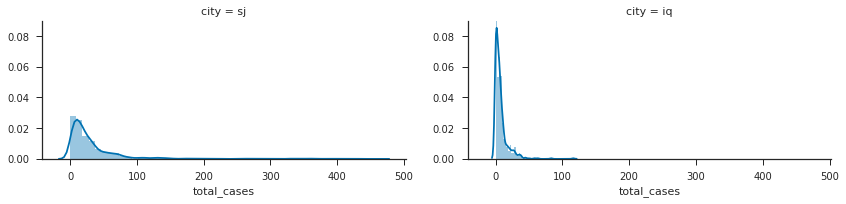

In [11]:
sns.set(style='ticks',palette='colorblind')
g=sns.FacetGrid(df,col='city',aspect=2)
g.map(sns.distplot,'total_cases')
axes=g.axes
axes[0,0].set_ylim(0,0.090)
axes[0,1].set_ylim(0,0.090)

In [12]:
# from the above visualization,it is clear that the cases in city=iq are higher in a certain period than the cases in city=sj

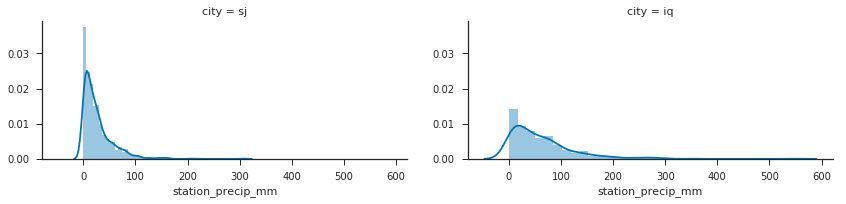

In [13]:
#lets check the stations precipitation_mm in the two cities
sns.set(style='ticks',palette='colorblind')
g=sns.FacetGrid(df,col='city',aspect=2)
g.map(sns.distplot,'station_precip_mm')

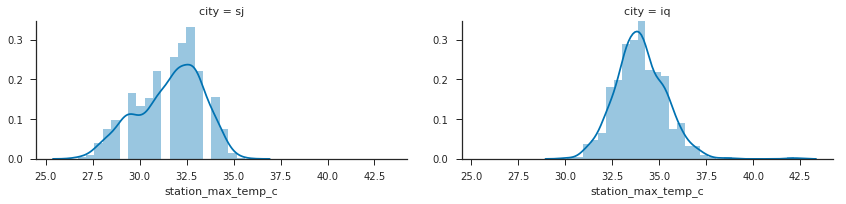

In [14]:
sns.set(style='ticks',palette='colorblind')
g=sns.FacetGrid(df,col='city',aspect=2)
g.map(sns.distplot,'station_max_temp_c')

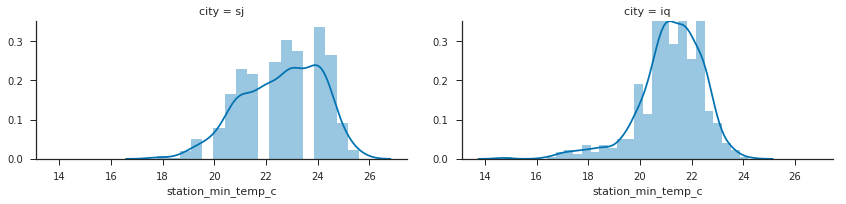

In [15]:
## lets check the staions minimum temp
sns.set(style='ticks',palette='colorblind')
g=sns.FacetGrid(df,col='city',aspect=2)
g.map(sns.distplot,'station_min_temp_c')

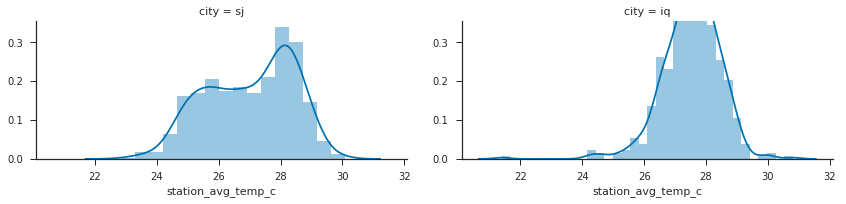

In [16]:
#lets check the stations average temperature
sns.set(style='ticks',palette='colorblind')
g=sns.FacetGrid(df,col='city',aspect=2)
g.map(sns.distplot,'station_avg_temp_c')

The above plots show that city-iq is much hotter than city=sj hence one could say this are cities in the tropical areas hence the reason for the dengue fever. Dengue fever is commonly found in the tropical areas and the above informtion is a prooof that this data is from a tropical region

In [17]:
df.groupby('city').mean().total_cases

city
iq     7.565385
sj    34.180556
Name: total_cases, dtype: float64

In [18]:
# we expected city=iq to have more cases of Dengue than city=sj due to its climate conditions but surprisingly its the oposite

/opt/conda/envs/DSX-Python35/lib/python3.5/site-packages/seaborn/categorical.py:1460: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data)


Text(0.5,0.98,'Evolution of dengue disease through time')

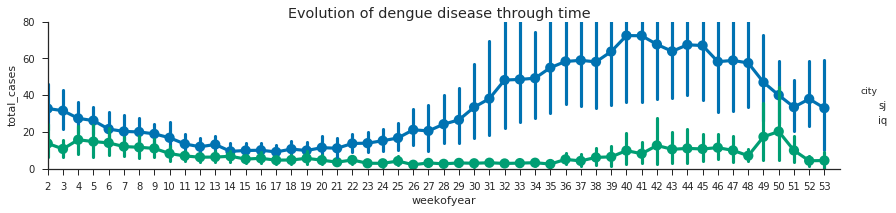

In [19]:
#lets check the evolution of Dengue disease through time
sns.set(style="ticks", palette="colorblind")
fig = sns.FacetGrid(df, hue='city', aspect=4) 
fig.map(sns.pointplot,'weekofyear','total_cases')
max_x = df.weekofyear.max()
min_x = df.weekofyear.min()
fig.set(xlim=(min_x,max_x))
fig.set(ylim=(0, 80))
fig.add_legend()
fig.fig.suptitle("Evolution of dengue disease through time")

 From the above visual, we can see that in the city=sj the numbers start rising from week 28 till the end of the year unlike in city=iq where the Dengue numbers grow slowly and only peak at week 50 the end of the year

In [20]:
# lets check for null values in our dataframe
df.isnull().sum()

city                                       0
year                                       0
weekofyear                                 0
week_start_date                            0
ndvi_ne                                  194
ndvi_nw                                   52
ndvi_se                                   22
ndvi_sw                                   22
precipitation_amt_mm                      13
reanalysis_air_temp_k                     10
reanalysis_avg_temp_k                     10
reanalysis_dew_point_temp_k               10
reanalysis_max_air_temp_k                 10
reanalysis_min_air_temp_k                 10
reanalysis_precip_amt_kg_per_m2           10
reanalysis_relative_humidity_percent      10
reanalysis_sat_precip_amt_mm              13
reanalysis_specific_humidity_g_per_kg     10
reanalysis_tdtr_k                         10
station_avg_temp_c                        43
station_diur_temp_rng_c                   43
station_max_temp_c                        20
station_mi

In [21]:
df_test.isnull().sum()

city                                      0
year                                      0
weekofyear                                0
week_start_date                           0
ndvi_ne                                  43
ndvi_nw                                  11
ndvi_se                                   1
ndvi_sw                                   1
precipitation_amt_mm                      2
reanalysis_air_temp_k                     2
reanalysis_avg_temp_k                     2
reanalysis_dew_point_temp_k               2
reanalysis_max_air_temp_k                 2
reanalysis_min_air_temp_k                 2
reanalysis_precip_amt_kg_per_m2           2
reanalysis_relative_humidity_percent      2
reanalysis_sat_precip_amt_mm              2
reanalysis_specific_humidity_g_per_kg     2
reanalysis_tdtr_k                         2
station_avg_temp_c                       12
station_diur_temp_rng_c                  12
station_max_temp_c                        3
station_min_temp_c              

In [22]:
#fillna(method='ffill') replace NaNs by preceding values in pandas DataFrame
df.fillna(method='ffill', inplace=True)
df_test.fillna(method='ffill',inplace=True)

In [23]:
df.isnull().sum()

city                                     0
year                                     0
weekofyear                               0
week_start_date                          0
ndvi_ne                                  0
ndvi_nw                                  0
ndvi_se                                  0
ndvi_sw                                  0
precipitation_amt_mm                     0
reanalysis_air_temp_k                    0
reanalysis_avg_temp_k                    0
reanalysis_dew_point_temp_k              0
reanalysis_max_air_temp_k                0
reanalysis_min_air_temp_k                0
reanalysis_precip_amt_kg_per_m2          0
reanalysis_relative_humidity_percent     0
reanalysis_sat_precip_amt_mm             0
reanalysis_specific_humidity_g_per_kg    0
reanalysis_tdtr_k                        0
station_avg_temp_c                       0
station_diur_temp_rng_c                  0
station_max_temp_c                       0
station_min_temp_c                       0
station_pre

In [24]:
df_test.isnull().sum()

city                                     0
year                                     0
weekofyear                               0
week_start_date                          0
ndvi_ne                                  0
ndvi_nw                                  0
ndvi_se                                  0
ndvi_sw                                  0
precipitation_amt_mm                     0
reanalysis_air_temp_k                    0
reanalysis_avg_temp_k                    0
reanalysis_dew_point_temp_k              0
reanalysis_max_air_temp_k                0
reanalysis_min_air_temp_k                0
reanalysis_precip_amt_kg_per_m2          0
reanalysis_relative_humidity_percent     0
reanalysis_sat_precip_amt_mm             0
reanalysis_specific_humidity_g_per_kg    0
reanalysis_tdtr_k                        0
station_avg_temp_c                       0
station_diur_temp_rng_c                  0
station_max_temp_c                       0
station_min_temp_c                       0
station_pre

In [25]:
# Get dummy variables for the citys
df=pd.get_dummies(data=df,columns=['city'])
df_test=pd.get_dummies(data=df_test,columns=['city'])

In [26]:
df.head()

,year,weekofyear,week_start_date,ndvi_ne,ndvi_nw,ndvi_se,ndvi_sw,precipitation_amt_mm,reanalysis_air_temp_k,reanalysis_avg_temp_k,...,reanalysis_specific_humidity_g_per_kg,reanalysis_tdtr_k,station_avg_temp_c,station_diur_temp_rng_c,station_max_temp_c,station_min_temp_c,station_precip_mm,total_cases,city_iq,city_sj
0,1990,18,1990-04-30,0.122600,0.103725,0.198483,0.177617,12.42,297.572857,297.742857,...,14.012857,2.628571,25.442857,6.900000,29.4,20.0,16.0,4,0,1
1,1990,19,1990-05-07,0.169900,0.142175,0.162357,0.155486,22.82,298.211429,298.442857,...,15.372857,2.371429,26.714286,6.371429,31.7,22.2,8.6,5,0,1
2,1990,20,1990-05-14,0.032250,0.172967,0.157200,0.170843,34.54,298.781429,298.878571,...,16.848571,2.300000,26.714286,6.485714,32.2,22.8,41.4,4,0,1
3,1990,21,1990-05-21,0.128633,0.245067,0.227557,0.235886,15.36,298.987143,299.228571,...,16.672857,2.428571,27.471429,6.771429,33.3,23.3,4.0,3,0,1
4,1990,22,1990-05-28,0.196200,0.262200,0.251200,0.247340,7.52,299.518571,299.664286,...,17.210000,3.014286,28.942857,9.371429,35.0,23.9,5.8,6,0,1


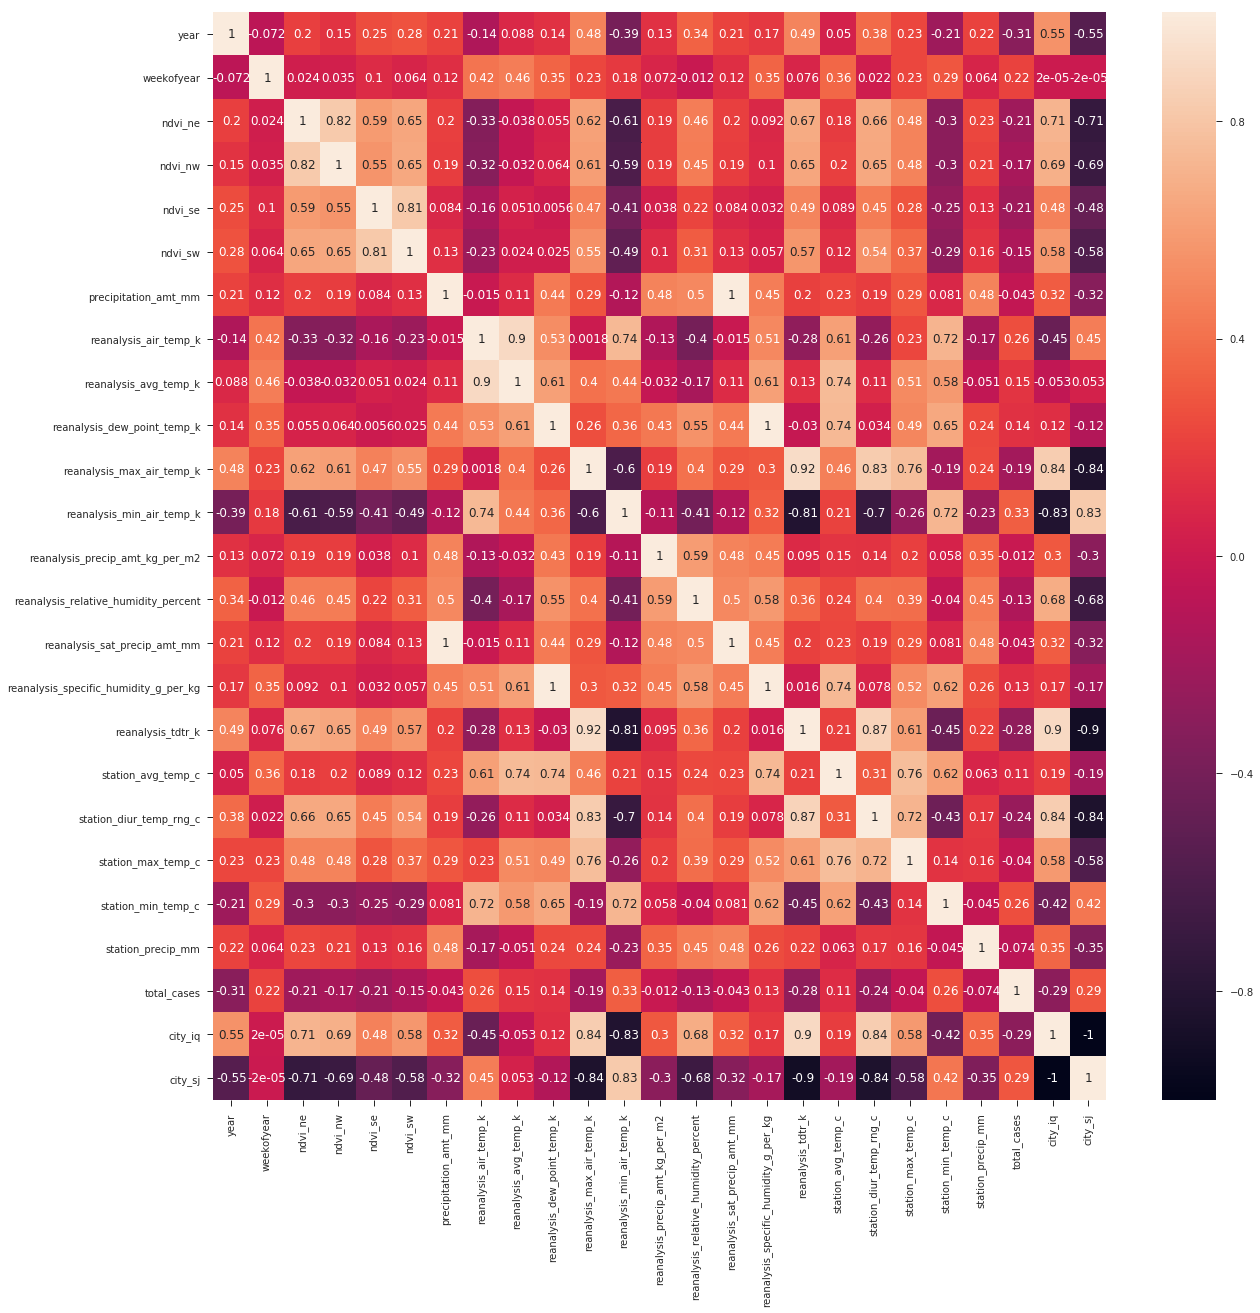

In [27]:
#check the correlation of the variables to pick the best parameters
plt.figure(figsize=(20,20))
sns.heatmap(df.corr(),annot=True)

In [28]:
print(df.corr())

                                           year  weekofyear   ndvi_ne  \
year                                   1.000000   -0.071649  0.200449   
weekofyear                            -0.071649    1.000000  0.023819   
ndvi_ne                                0.200449    0.023819  1.000000   
ndvi_nw                                0.147472    0.034657  0.824107   
ndvi_se                                0.250522    0.102724  0.586109   
ndvi_sw                                0.279822    0.064415  0.645100   
precipitation_amt_mm                   0.212180    0.124856  0.195393   
reanalysis_air_temp_k                 -0.137600    0.420022 -0.331672   
reanalysis_avg_temp_k                  0.087929    0.457507 -0.038252   
reanalysis_dew_point_temp_k            0.137358    0.347098  0.054772   
reanalysis_max_air_temp_k              0.481219    0.234101  0.621991   
reanalysis_min_air_temp_k             -0.391338    0.179207 -0.612693   
reanalysis_precip_amt_kg_per_m2        0.133967    

In [56]:
df.columns

Index(['year', 'weekofyear', 'week_start_date', 'ndvi_ne', 'ndvi_nw',
       'ndvi_se', 'ndvi_sw', 'precipitation_amt_mm', 'reanalysis_air_temp_k',
       'reanalysis_avg_temp_k', 'reanalysis_dew_point_temp_k',
       'reanalysis_max_air_temp_k', 'reanalysis_min_air_temp_k',
       'reanalysis_precip_amt_kg_per_m2',
       'reanalysis_relative_humidity_percent', 'reanalysis_sat_precip_amt_mm',
       'reanalysis_specific_humidity_g_per_kg', 'reanalysis_tdtr_k',
       'station_avg_temp_c', 'station_diur_temp_rng_c', 'station_max_temp_c',
       'station_min_temp_c', 'station_precip_mm', 'total_cases', 'city_iq',
       'city_sj'],
      dtype='object')

In [112]:
# choose your variables for x based on the correlation
#i first excluded the variables with a negative correlation
x=df[['weekofyear','ndvi_ne', 'ndvi_nw',
       'ndvi_se', 'ndvi_sw','precipitation_amt_mm','reanalysis_air_temp_k','reanalysis_avg_temp_k','reanalysis_dew_point_temp_k','reanalysis_max_air_temp_k',
     'reanalysis_min_air_temp_k','reanalysis_precip_amt_kg_per_m2','reanalysis_relative_humidity_percent','reanalysis_sat_precip_amt_mm',
     'reanalysis_specific_humidity_g_per_kg','reanalysis_tdtr_k','station_avg_temp_c','station_diur_temp_rng_c','station_max_temp_c',
     'station_min_temp_c','station_precip_mm','city_sj']].values

In [69]:
y=df['total_cases'].values

### Normalize the data

In [113]:
x=preprocessing.StandardScaler().fit(x).transform(x)

### Train split the data

In [114]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=4)

In [72]:
x_train.shape

(1019, 18)

In [73]:
y_train.shape

(1019,)

### Model the data

In [115]:
model1=LinearRegression()
model2=Ridge(alpha=0.1,random_state=4,solver='auto',tol=0.001,fit_intercept=True,copy_X=True,normalize=True)
model3=GradientBoostingRegressor(alpha=0.1, criterion='friedman_mse', init=None,
             learning_rate=0.1, loss='ls', max_depth=3, max_features=None,
             max_leaf_nodes=None, min_impurity_decrease=0.0,
             min_impurity_split=None, min_samples_leaf=1,
             min_samples_split=2, min_weight_fraction_leaf=0.0,
             n_estimators=50, presort='auto', random_state=4,
             subsample=1.0, verbose=0, warm_start=False)
model4=RandomForestRegressor()

In [36]:
parameters=[{'alpha':[0.001,0.1,1,10,100,1000],'normalize':[True,False],'random_state':[4,7,10]}]
Grid1=GridSearchCV(model2,parameters,cv=4)
Grid1.fit(x_train,y_train)

GridSearchCV(cv=4, error_score='raise',
       estimator=Ridge(alpha=0.1, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=True, random_state=4, solver='auto', tol=0.001),
       fit_params=None, iid=True, n_jobs=1,
       param_grid=[{'random_state': [4, 7, 10], 'normalize': [True, False], 'alpha': [0.001, 0.1, 1, 10, 100, 1000]}],
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [37]:
Grid1.best_estimator_

Ridge(alpha=100, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=4, solver='auto', tol=0.001)

In [38]:
parameters2=[{'n_estimators':[50,100,200,300,400,500],'random_state':[4],'alpha':[0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]}]
Grid2=GridSearchCV(model3,parameters2,cv=4)
Grid2.fit(x_train,y_train)

GridSearchCV(cv=4, error_score='raise',
       estimator=GradientBoostingRegressor(alpha=0.1, criterion='friedman_mse', init=None,
             learning_rate=0.1, loss='ls', max_depth=3, max_features=None,
             max_leaf_nodes=None, min_impurity_decrease=0.0,
             min_impurity_split=None, min_samples_leaf=1,
             min_samples_split=2, min_weight_fraction_leaf=0.0,
             n_estimators=50, presort='auto', random_state=4,
             subsample=1.0, verbose=0, warm_start=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid=[{'random_state': [4], 'alpha': [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9], 'n_estimators': [50, 100, 200, 300, 400, 500]}],
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [39]:
Grid2.best_estimator_

GradientBoostingRegressor(alpha=0.1, criterion='friedman_mse', init=None,
             learning_rate=0.1, loss='ls', max_depth=3, max_features=None,
             max_leaf_nodes=None, min_impurity_decrease=0.0,
             min_impurity_split=None, min_samples_leaf=1,
             min_samples_split=2, min_weight_fraction_leaf=0.0,
             n_estimators=50, presort='auto', random_state=4,
             subsample=1.0, verbose=0, warm_start=False)

### Fit the models now

In [116]:
model1.fit(x_train,y_train)
model2.fit(x_train,y_train)
model3.fit(x_train,y_train)
model4.fit(x_train,y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

### Yhat Prediction

In [117]:
yhat1=model1.predict(x_test)
yhat2=model2.predict(x_test)
yhat3=model3.predict(x_test)
yhat4=model4.predict(x_test)

#### Evaluate your models

In [118]:
mse=metrics.mean_absolute_error(y_test,yhat1)
mse

23.386037257007128

In [119]:
mse1=metrics.mean_absolute_error(y_test,yhat2)
mse1

22.519522509690717

In [120]:
mse2=metrics.mean_absolute_error(y_test,yhat3)
mse2

16.947069544433141

In [121]:
mse3=metrics.mean_absolute_error(y_test,yhat4)
mse3

19.741095890410957

### Predict the test data

In [122]:
test=df_test[['weekofyear','ndvi_ne', 'ndvi_nw',
       'ndvi_se', 'ndvi_sw','precipitation_amt_mm','reanalysis_air_temp_k','reanalysis_avg_temp_k','reanalysis_dew_point_temp_k','reanalysis_max_air_temp_k',
     'reanalysis_min_air_temp_k','reanalysis_precip_amt_kg_per_m2','reanalysis_relative_humidity_percent','reanalysis_sat_precip_amt_mm',
     'reanalysis_specific_humidity_g_per_kg','reanalysis_tdtr_k','station_avg_temp_c','station_diur_temp_rng_c','station_max_temp_c',
     'station_min_temp_c','station_precip_mm','city_sj']].values

In [123]:
#normalize the test data
test=preprocessing.StandardScaler().fit(test).transform(test)

In [124]:
prediction=model3.predict(test).astype(int)
prediction

array([12, 10,  6, 11, 13, 14, 13, 16, 16, 33, 16, 32, 24, 21, 33, 26, 30,
       36, 76, 39, 37, 42, 34, 50, 46, 44, 46, 36, 39, 39, 60, 44, 45, 44,
       35, 27, 17, 27, 26, 27, 16, 20, 20, 18, 16,  9, 14, 10, 28, 15, 11,
       11, 21, 12, 19, 14, 16, 16, 15, 24, 17, 34, 20, 45, 31, 35, 46, 45,
       38, 82, 51, 31, 26, 52, 71, 81, 57, 33, 36, 44, 33, 40, 40, 41, 44,
       37, 50, 50, 20, 18, 23, 22, 33, 11, 11, 16, 17, 10,  9, 10, 12,  9,
       14, 13, 13, 15, 14, 25, 12, 33, 40, 17, 26, 41, 33, 27, 22, 51, 32,
       59, 64, 60, 58, 47, 48, 31, 30, 56, 46, 35, 37, 48, 52, 43, 36, 41,
       28, 21, 35, 45, 30, 28, 22, 22, 26, 23, 15, 18, 32, 18, 26, 17, 20,
       15, 16, 16, 13, 11, 26, 14, 21, 23, 20, 61, 45, 57, 29, 31, 28, 64,
       39, 71, 48, 68, 82, 48, 44, 46, 51, 37, 46, 46, 43, 39, 40, 36, 46,
       31, 40, 55, 32, 45, 31, 28, 25, 29, 25, 18, 19, 17, 18, 19, 20, 12,
       22, 17, 12, 21, 19, 15, 22, 12, 15, 16, 16, 23, 52, 26, 15, 29, 15,
       34, 23, 35, 65, 42

In [125]:
total_cases=pd.DataFrame(prediction)
total_cases.columns=['total_cases']
total_cases.head()

,total_cases
0,12
1,10
2,6
3,11
4,13


#### concat the total_cases with df_test

In [126]:

body = client_887e8fed66994bce85b726a4b6eee3dd.get_object(Bucket='dengaipredictingdiseasespread-donotdelete-pr-9ljhigmhx6empl',Key='dengue_features_test.csv')['Body']
# add missing __iter__ method, so pandas accepts body as file-like object
if not hasattr(body, "__iter__"): body.__iter__ = types.MethodType( __iter__, body )

df_test_data = pd.read_csv(body)
df_test_data.head()

df_final=pd.concat([df_test_data,total_cases],axis=1)
df_final.head()

,city,year,weekofyear,week_start_date,ndvi_ne,ndvi_nw,ndvi_se,ndvi_sw,precipitation_amt_mm,reanalysis_air_temp_k,...,reanalysis_relative_humidity_percent,reanalysis_sat_precip_amt_mm,reanalysis_specific_humidity_g_per_kg,reanalysis_tdtr_k,station_avg_temp_c,station_diur_temp_rng_c,station_max_temp_c,station_min_temp_c,station_precip_mm,total_cases
0,sj,2008,18,2008-04-29,-0.0189,-0.018900,0.102729,0.091200,78.60,298.492857,...,78.781429,78.60,15.918571,3.128571,26.528571,7.057143,33.3,21.7,75.2,12
1,sj,2008,19,2008-05-06,-0.0180,-0.012400,0.082043,0.072314,12.56,298.475714,...,78.230000,12.56,15.791429,2.571429,26.071429,5.557143,30.0,22.2,34.3,10
2,sj,2008,20,2008-05-13,-0.0015,NaN,0.151083,0.091529,3.66,299.455714,...,78.270000,3.66,16.674286,4.428571,27.928571,7.785714,32.8,22.8,3.0,6
3,sj,2008,21,2008-05-20,NaN,-0.019867,0.124329,0.125686,0.00,299.690000,...,73.015714,0.00,15.775714,4.342857,28.057143,6.271429,33.3,24.4,0.3,11
4,sj,2008,22,2008-05-27,0.0568,0.039833,0.062267,0.075914,0.76,299.780000,...,74.084286,0.76,16.137143,3.542857,27.614286,7.085714,33.3,23.3,84.1,13


In [127]:
#extract the columns needed for the submission in the competition
df_submission=df_final[['city','year','weekofyear','total_cases']]
df_submission.head()

,city,year,weekofyear,total_cases
0,sj,2008,18,12
1,sj,2008,19,10
2,sj,2008,20,6
3,sj,2008,21,11
4,sj,2008,22,13


In [128]:
df_submission.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 416 entries, 0 to 415
Data columns (total 4 columns):
city           416 non-null object
year           416 non-null int64
weekofyear     416 non-null int64
total_cases    416 non-null int64
dtypes: int64(3), object(1)
memory usage: 13.1+ KB


In [129]:
project.save_data(data=df_submission.to_csv(index=False),file_name='Gradient_prediction.csv',overwrite=True)

{'asset_id': '6b71a2c7-49ee-4931-90bd-41c68640f2dd',
 'bucket_name': 'dengaipredictingdiseasespread-donotdelete-pr-9ljhigmhx6empl',
 'file_name': 'Gradient_prediction.csv',
 'message': 'File saved to project storage.'}

In [105]:
prediction2=model4.predict(test).astype(int)
prediction2

array([  8,  11,  11,  33,   8,  15,  13,  43,   9,  46,  21,  44,  17,
        49,  36,  89,  61,  33, 163,  51,  49,  39,  96,  64,  61,  48,
       109,  34, 124,  28,  38,  66,  33,  55,  38,  28,  32,  45,  32,
        34,  12,  20,  14,  19,  23,  12,  13,   5,  14,   6,  11,  14,
        11,   8,  16,  11,   3,   8,  15,  29,  15,  37,  12,  17,  12,
        15,  63,  15,  38,  96, 239,  26,  40,  56,  56, 109,  91,  37,
       225,  82,  29,  83,  31,  61,  19,  40, 117, 117,  23,  11,  33,
        18,  46,  17,  11,  20,  19,  20,  12,  11,  23,  14,  17,   9,
        28,  16,  19,  46,  10,  46,  47,  29,  69,  32,  29,  57,  43,
        43,  48,  65, 101,  69, 105,  27,  34,  27,  25,  27,  31,  43,
        56,  34,  90,  24,  98,  89,  38,  51,  25,  73,  25,  35,  27,
        53,  43,  15,  20,  16,  17,  34,  22,  14,  15,  17,   9,  17,
         7,  19,  21,  21,  32,  20,  14,  38,  11,  47,  68,  61,  24,
        36,  19, 107,  38,  48,  39,  31,  34,  42,  48,  48,  7

In [107]:
total_cases1=pd.DataFrame(prediction2,columns=['total_cases'])
total_cases1.head()

,total_cases
0,8
1,11
2,11
3,33
4,8


In [108]:
df_final1=pd.concat([df_test_data,total_cases1],axis=1)
df_final1.head()

,city,year,weekofyear,week_start_date,ndvi_ne,ndvi_nw,ndvi_se,ndvi_sw,precipitation_amt_mm,reanalysis_air_temp_k,...,reanalysis_relative_humidity_percent,reanalysis_sat_precip_amt_mm,reanalysis_specific_humidity_g_per_kg,reanalysis_tdtr_k,station_avg_temp_c,station_diur_temp_rng_c,station_max_temp_c,station_min_temp_c,station_precip_mm,total_cases
0,sj,2008,18,2008-04-29,-0.0189,-0.018900,0.102729,0.091200,78.60,298.492857,...,78.781429,78.60,15.918571,3.128571,26.528571,7.057143,33.3,21.7,75.2,8
1,sj,2008,19,2008-05-06,-0.0180,-0.012400,0.082043,0.072314,12.56,298.475714,...,78.230000,12.56,15.791429,2.571429,26.071429,5.557143,30.0,22.2,34.3,11
2,sj,2008,20,2008-05-13,-0.0015,NaN,0.151083,0.091529,3.66,299.455714,...,78.270000,3.66,16.674286,4.428571,27.928571,7.785714,32.8,22.8,3.0,11
3,sj,2008,21,2008-05-20,NaN,-0.019867,0.124329,0.125686,0.00,299.690000,...,73.015714,0.00,15.775714,4.342857,28.057143,6.271429,33.3,24.4,0.3,33
4,sj,2008,22,2008-05-27,0.0568,0.039833,0.062267,0.075914,0.76,299.780000,...,74.084286,0.76,16.137143,3.542857,27.614286,7.085714,33.3,23.3,84.1,8


In [109]:
df_submission1=df_final1[['city','year','weekofyear','total_cases']]
df_submission1.head()

,city,year,weekofyear,total_cases
0,sj,2008,18,8
1,sj,2008,19,11
2,sj,2008,20,11
3,sj,2008,21,33
4,sj,2008,22,8


In [110]:
project.save_data(data=df_submission1.to_csv(index=False),file_name='Random_prediction.csv',overwrite=True)

{'asset_id': '98467e60-df1d-4db2-afd6-a8af82807dbc',
 'bucket_name': 'dengaipredictingdiseasespread-donotdelete-pr-9ljhigmhx6empl',
 'file_name': 'Random_prediction.csv',
 'message': 'File saved to project storage.'}